<a href="https://colab.research.google.com/github/richie-1/CNN/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as mod
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10 as cf
from torch.utils.data import DataLoader as dl
from torch.optim import Adam
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
c = cf(root = "./data", train=True, download = True)
X = c.data
Y = c.targets
X.shape

Extracting ./data/cifar-10-python.tar.gz to ./data


(50000, 32, 32, 3)

In [3]:
c.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [4]:
def display(X, Y, l, grid=(2,2)):
    y_= [x for x, z in enumerate(Y) if l==z]
    random.shuffle(y_)
    r= grid[0]
    col= grid[1]
    fig, axes= plt.subplots(r, col)
    fig.set_figheight(5)
    fig.set_figwidth(5)
    for r in axes:
        for col in r:
            col.imshow(X[y_.pop()])
    plt.show()

Truck


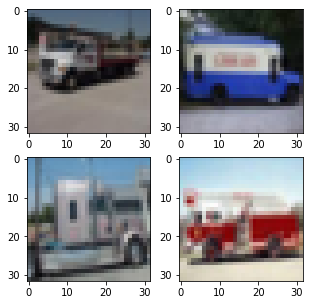

In [5]:
print('Truck')
display(X,Y,9)

Horse samples


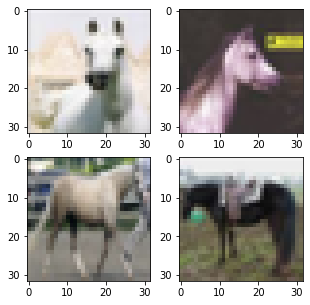

In [6]:
print('Horse samples')
display(X,Y,7)

In [7]:
# Transform in train set
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Transform in test set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),])

In [8]:
# Load train set
tr_set = cf(root='./data', train=True, download=True, transform=transform_train)
#Loader for train set
tr_load = dl(tr_set, batch_size=32, shuffle=False, num_workers=4)
# Load test set
te_set = cf(root='./data', train=False, download=True, transform=transform_test)
#Loader for train set
te_load = dl(te_set, batch_size=32, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
class Block(nn.Module):
    def __init__(self, Input, Output):
        super(Block,self).__init__()
        self.c = nn.Conv2d(in_channels=Input, out_channels=Output, kernel_size=3, stride=1, padding=1)
        self.b = nn.BatchNorm2d(Output)
        self.r = nn.ReLU()
        
    def forward(self, x):
        out = self.c(x)
        out = self.b(out)
        out = self.r(out)
        return out

In [10]:
class CNN(nn.Module):
    def __init__(self, classes):
        super(CNN, self).__init__()
        
        self.cnn = nn.Sequential(
        
        Block(Input=3, Output=32),
        Block(Input=32, Output=32),
        nn.MaxPool2d(kernel_size=2),
        Block(Input=32, Output=64),
        Block(Input=64, Output=64),
        nn.MaxPool2d(kernel_size=2),
        Block(Input=64, Output=128),
        Block(Input=128, Output=128),
        nn.MaxPool2d(kernel_size=2),
        Block(Input=128, Output=128),
        nn.MaxPool2d(kernel_size=4)
        )
        
        self.fc = nn.Sequential(
        nn.Linear(128,classes),
        )
        
    def forward(self, x):
        out = self.cnn(x)
        out = out.view(-1,128)
        out = self.fc(out)
        return out

In [11]:
def train(ep):
    train_loss = []
    acc = []
    for epoch in range(ep):
        model.train()
        atr = 0
        losstr = 0
        t=0
        
        for i, (x, y) in enumerate(tr_load):
            x, y = x.to('cuda'), y.to('cuda')
            optimizer.zero_grad()
            o = model(x)
            l = loss(o, y)
            l.backward()
            losstr += l.item()
            optimizer.step()
            _, p = torch.max(o.data,1)
            atr += (p==y.data).float().sum()
            atr = atr.item()
            t += y.size(0)
        ls = losstr/(i+1)
        train_loss.append(ls)
        a = round(atr/t,2)
        acc.append(a)
        print('Training Loss after ', epoch+1,' : ',ls )
        print('Training Accuracy after ', epoch+1 ,' : ',(atr/t))
    plt.plot(range(ep),train_loss, label='Training loss')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    plt.plot(range(ep),acc, label='Accuracy')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()
    accuracytr = atr/len(tr_set)
    print('Train accuracy :', accuracytr)
    accte = test()
    print('Test accuracy :', accte)


In [12]:
def test():
    model.eval()
    accuracyte = 0
    ate = 0
    for i, (x, y) in enumerate(te_load):
        x, y = x.to('cuda'), y.to('cuda')
        output = model(x)
        _, p = torch.max(output.data,1)
        ate += (p==y.data).float().sum()
        
    accuracyte = ate/len(te_set)
    return accuracyte    

In [13]:
model = CNN(classes=10)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss = nn.CrossEntropyLoss()
model = model.to('cuda')

Training Loss after  1  :  1.062723820818134
Training Accuracy after  1  :  0.62028
Training Loss after  2  :  0.665526126631162
Training Accuracy after  2  :  0.76934
Training Loss after  3  :  0.5065380377660404
Training Accuracy after  3  :  0.82658
Training Loss after  4  :  0.38822289387876036
Training Accuracy after  4  :  0.86794
Training Loss after  5  :  0.2933813538199728
Training Accuracy after  5  :  0.90176
Training Loss after  6  :  0.22576800364701843
Training Accuracy after  6  :  0.92536
Training Loss after  7  :  0.17571795147605912
Training Accuracy after  7  :  0.93936
Training Loss after  8  :  0.15077845144764265
Training Accuracy after  8  :  0.94804
Training Loss after  9  :  0.1227216983514332
Training Accuracy after  9  :  0.95728
Training Loss after  10  :  0.1149471708739049
Training Accuracy after  10  :  0.95866
Training Loss after  11  :  0.11207387993178942
Training Accuracy after  11  :  0.96048
Training Loss after  12  :  0.09708283863917305
Training A

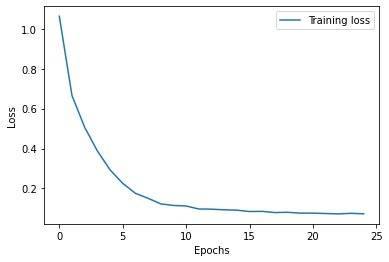

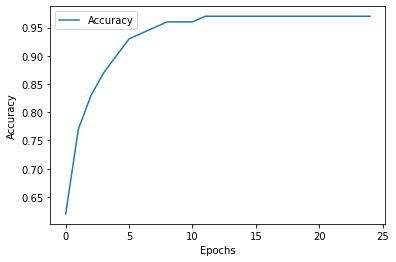

Train accuracy : 0.97412
Test accuracy : tensor(0.8369, device='cuda:0')


In [14]:
if __name__ =='__main__':
        train(25)

In [15]:
#Testing classification accuracy for individual classes.

cls = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
right = list(0. for i in range(10))
total = list(0. for i in range(10))
with torch.no_grad():
    for i in te_load:
        x, y = i[0].to('cuda'), i[1].to('cuda')
        outputs = model(x)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == y).squeeze()
        for i in range(4):
            label = y[i]
            right[label] += c[i].item()
            total[label] += 1

for i in range(10):
    print('Accuracy of',cls[i],' : %2d %%' % ( 100 * right[i] / total[i]))


Accuracy of Airplane  : 88 %
Accuracy of Car  : 95 %
Accuracy of Bird  : 74 %
Accuracy of Cat  : 68 %
Accuracy of Deer  : 85 %
Accuracy of Dog  : 76 %
Accuracy of Frog  : 84 %
Accuracy of Horse  : 92 %
Accuracy of Ship  : 90 %
Accuracy of Truck  : 96 %


In [35]:
print(model)

CNN(
  (cnn): Sequential(
    (0): Block(
      (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (r): ReLU()
    )
    (1): Block(
      (c): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (r): ReLU()
    )
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Block(
      (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (r): ReLU()
    )
    (4): Block(
      (c): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (b): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (r): ReLU()
    )
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [17]:
# Data Augmentation

In [18]:
# Data augmentation in train set
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

#No data augmentation in test set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),])

In [19]:
# Load train set
tr_set = cf(root='./data', train=True, download=True, transform=transform_train)
#Loader for train set
tr_load = dl(tr_set, batch_size=32, shuffle=False, num_workers=4)
# Load test set
te_set = cf(root='./data', train=False, download=True, transform=transform_test)
#Loader for train set
te_load = dl(te_set, batch_size=32, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


After Data Augmentation
Training Loss after  1  :  0.6282495262240723
Training Accuracy after  1  :  0.8036
Training Loss after  2  :  0.4652744691416154
Training Accuracy after  2  :  0.84246
Training Loss after  3  :  0.42474269490839195
Training Accuracy after  3  :  0.85492
Training Loss after  4  :  0.4017102349804558
Training Accuracy after  4  :  0.86276
Training Loss after  5  :  0.3788107572575067
Training Accuracy after  5  :  0.8691
Training Loss after  6  :  0.36126593652438144
Training Accuracy after  6  :  0.87548
Training Loss after  7  :  0.3510779863961103
Training Accuracy after  7  :  0.87894
Training Loss after  8  :  0.34086404083223965
Training Accuracy after  8  :  0.88132
Training Loss after  9  :  0.32541890336309043
Training Accuracy after  9  :  0.88582
Training Loss after  10  :  0.3197474996925773
Training Accuracy after  10  :  0.88964
Training Loss after  11  :  0.309761571168175
Training Accuracy after  11  :  0.8915
Training Loss after  12  :  0.3033116

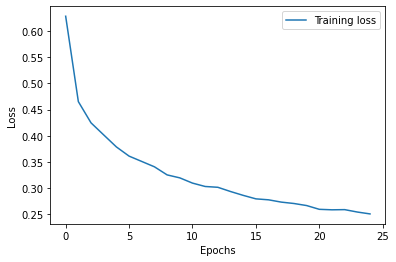

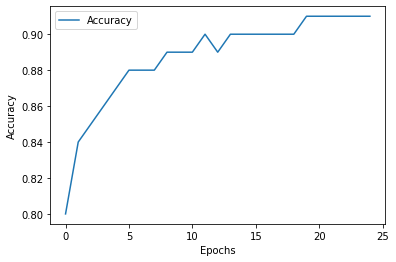

Train accuracy : 0.9117
Test accuracy : tensor(0.8780, device='cuda:0')


In [20]:
if __name__ =='__main__':
        print('After Data Augmentation')
        train(25)

In [21]:
# Accuracy for individual classes

cls = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
right = list(0. for i in range(10))
total = list(0. for i in range(10))
with torch.no_grad():
    for i in te_load:
        x, y= i[0].to('cuda'), i[1].to('cuda')
        outputs= model(x)
        _, predicted= torch.max(outputs, 1)
        c= (predicted == y).squeeze()
        for i in range(4):
            label= y[i]
            right[label] += c[i].item()
            total[label] += 1

for i in range(10):
    print('Accuracy of',cls[i],' : %2d %%' % ( 100 * right[i] / total[i]))


Accuracy of Airplane  : 86 %
Accuracy of Car  : 93 %
Accuracy of Bird  : 84 %
Accuracy of Cat  : 75 %
Accuracy of Deer  : 87 %
Accuracy of Dog  : 84 %
Accuracy of Frog  : 93 %
Accuracy of Horse  : 95 %
Accuracy of Ship  : 93 %
Accuracy of Truck  : 92 %


# AlexNet

In [32]:
model_alex = mod.alexnet()
optimizer = torch.optim.SGD(model_alex.parameters(), lr=0.001, momentum=0.7)
loss = nn.CrossEntropyLoss()
model = model.to('cuda')

Training Loss after  1  :  0.22518549826870876
Training Accuracy after  1  :  0.9216
Training Loss after  2  :  0.2215314271144202
Training Accuracy after  2  :  0.92292
Training Loss after  3  :  0.22474955772874985
Training Accuracy after  3  :  0.9216
Training Loss after  4  :  0.22403459509290036
Training Accuracy after  4  :  0.92228
Training Loss after  5  :  0.22558831258111478
Training Accuracy after  5  :  0.92098
Training Loss after  6  :  0.22313189476022946
Training Accuracy after  6  :  0.9226
Training Loss after  7  :  0.22137712955567806
Training Accuracy after  7  :  0.92374
Training Loss after  8  :  0.22126511014850186
Training Accuracy after  8  :  0.92224
Training Loss after  9  :  0.22435304879551124
Training Accuracy after  9  :  0.9207
Training Loss after  10  :  0.22446293269372852
Training Accuracy after  10  :  0.9213
Training Loss after  11  :  0.2230788184245256
Training Accuracy after  11  :  0.9222
Training Loss after  12  :  0.22297342733842912
Training A

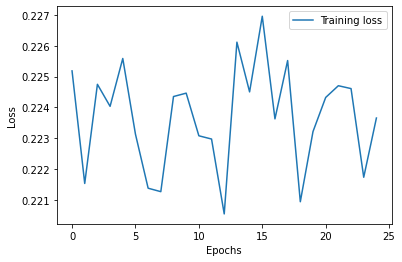

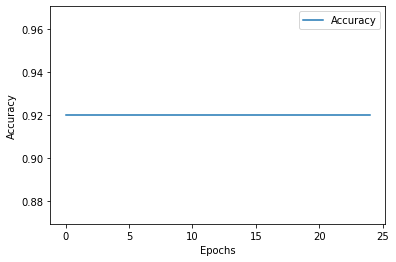

Train accuracy : 0.92314
Test accuracy : tensor(0.8782, device='cuda:0')


In [33]:
if __name__ =='__main__':
        train(25)

In [26]:
# Accuracy for individual classes

cls = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
right = list(0. for i in range(10))
total = list(0. for i in range(10))
with torch.no_grad():
    for i in te_load:
        x, y= i[0].to('cuda'), i[1].to('cuda')
        outputs= model(x)
        _, predicted= torch.max(outputs, 1)
        c= (predicted == y).squeeze()
        for i in range(4):
            label= y[i]
            right[label] += c[i].item()
            total[label] += 1

for i in range(10):
    print('Accuracy of',cls[i],' : %2d %%' % ( 100 * right[i] / total[i]))


Accuracy of Airplane  : 87 %
Accuracy of Car  : 94 %
Accuracy of Bird  : 84 %
Accuracy of Cat  : 75 %
Accuracy of Deer  : 85 %
Accuracy of Dog  : 86 %
Accuracy of Frog  : 92 %
Accuracy of Horse  : 94 %
Accuracy of Ship  : 92 %
Accuracy of Truck  : 94 %


# Resnet 18

In [27]:
model_resnet18 = mod.resnet18()
optimizer = torch.optim.SGD(model_alex.parameters(), lr=0.0001, momentum=0.9)
loss = nn.CrossEntropyLoss()
model = model.to('cuda')

Training Loss after  1  :  0.2257761369451585
Training Accuracy after  1  :  0.92194
Training Loss after  2  :  0.22264112833999358
Training Accuracy after  2  :  0.92312
Training Loss after  3  :  0.2222639028392899
Training Accuracy after  3  :  0.92252
Training Loss after  4  :  0.22464731226479176
Training Accuracy after  4  :  0.92044
Training Loss after  5  :  0.22726021975014293
Training Accuracy after  5  :  0.92052
Training Loss after  6  :  0.22629986069345714
Training Accuracy after  6  :  0.92202
Training Loss after  7  :  0.22201720228679692
Training Accuracy after  7  :  0.92334
Training Loss after  8  :  0.22460846064620613
Training Accuracy after  8  :  0.9215
Training Loss after  9  :  0.22209858358197118
Training Accuracy after  9  :  0.92322
Training Loss after  10  :  0.2214787722960286
Training Accuracy after  10  :  0.92376
Training Loss after  11  :  0.22237110107074123
Training Accuracy after  11  :  0.9214
Training Loss after  12  :  0.22280404203817467
Trainin

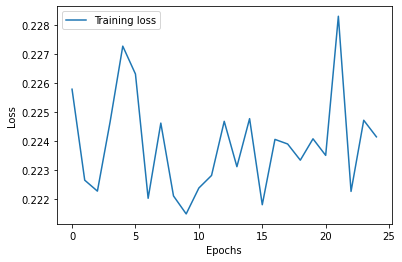

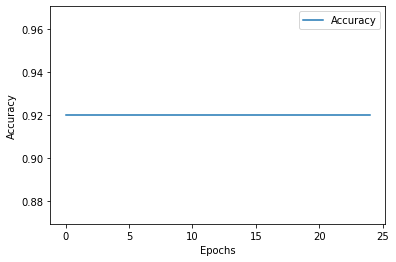

Train accuracy : 0.92194
Test accuracy : tensor(0.8777, device='cuda:0')


In [28]:
if __name__ =='__main__':
        train(25)

In [29]:
# Accuracy for individual classes

cls = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
right = list(0. for i in range(10))
total = list(0. for i in range(10))
with torch.no_grad():
    for i in te_load:
        x, y= i[0].to('cuda'), i[1].to('cuda')
        outputs= model(x)
        _, predicted= torch.max(outputs, 1)
        c= (predicted == y).squeeze()
        for i in range(4):
            label= y[i]
            right[label] += c[i].item()
            total[label] += 1

for i in range(10):
    print('Accuracy of',cls[i],' : %2d %%' % ( 100 * right[i] / total[i]))


Accuracy of Airplane  : 87 %
Accuracy of Car  : 94 %
Accuracy of Bird  : 83 %
Accuracy of Cat  : 76 %
Accuracy of Deer  : 85 %
Accuracy of Dog  : 87 %
Accuracy of Frog  : 91 %
Accuracy of Horse  : 94 %
Accuracy of Ship  : 92 %
Accuracy of Truck  : 93 %


# CNN - Bonus

In [54]:
class Block_n(nn.Module):
    def __init__(self, Input, Output):
        super(Block_n,self).__init__()
        self.c = nn.Conv2d(in_channels=Input, out_channels=Output, kernel_size=3, stride=1, padding=1)
        self.b = nn.BatchNorm2d(Output)
        self.r = nn.ReLU()
        self.d = nn.Dropout(p=0.2)
        
    def forward(self, x):
        out = self.c(x)
        out = self.b(out)
        out = self.r(out)
        out = self.d(out)
        return out

In [55]:
class CNN_m(nn.Module):
    def __init__(self, classes):
        super(CNN_m, self).__init__()
        
        self.cnn = nn.Sequential(
        
        Block_n(Input=3, Output=32),
        Block_n(Input=32, Output=32),
        nn.MaxPool2d(kernel_size=2),
        Block_n(Input=32, Output=64),
        Block_n(Input=64, Output=64),
        nn.MaxPool2d(kernel_size=2),
        Block_n(Input=64, Output=128),
        Block_n(Input=128, Output=128),
        nn.MaxPool2d(kernel_size=2),
        Block_n(Input=128, Output=128),
        nn.MaxPool2d(kernel_size=4)
        )
        
        self.fc = nn.Sequential(
        nn.Linear(128,classes),
        )
        
    def forward(self, x):
        out = self.cnn(x)
        out = out.view(-1,128)
        out = self.fc(out)
        return out

In [56]:
model = CNN_m(classes=10)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss = nn.CrossEntropyLoss()
model = model.to('cuda')

After Data Augmentation and Droupout
Training Loss after  1  :  1.363421208417652
Training Accuracy after  1  :  0.5004
Training Loss after  2  :  0.9420177589146205
Training Accuracy after  2  :  0.66994
Training Loss after  3  :  0.7929160148382034
Training Accuracy after  3  :  0.72342
Training Loss after  4  :  0.7106658856951115
Training Accuracy after  4  :  0.75356
Training Loss after  5  :  0.6619129597911908
Training Accuracy after  5  :  0.76982
Training Loss after  6  :  0.6225925485960428
Training Accuracy after  6  :  0.78466
Training Loss after  7  :  0.5896360634117651
Training Accuracy after  7  :  0.79708
Training Loss after  8  :  0.5633661388988611
Training Accuracy after  8  :  0.80472
Training Loss after  9  :  0.5408730591127144
Training Accuracy after  9  :  0.81416
Training Loss after  10  :  0.5259810703462771
Training Accuracy after  10  :  0.81848
Training Loss after  11  :  0.5103406226184989
Training Accuracy after  11  :  0.82366
Training Loss after  12  :

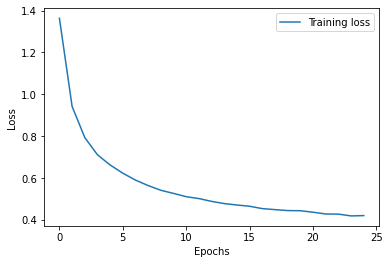

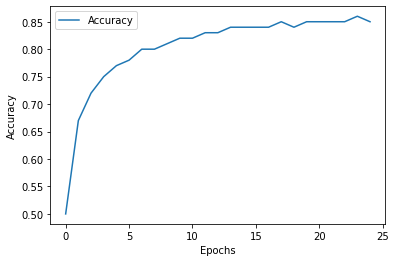

Train accuracy : 0.85426
Test accuracy : tensor(0.8522, device='cuda:0')


In [57]:
if __name__ =='__main__':
        print('After Data Augmentation and Droupout')
        train(25)

# End